# Recsys'20 Feature Engineering Tutorial Part 3
> RecSys'20 tutorial on feature engineering on a large retail dataset part 3

- toc: true
- badges: true
- comments: true
- categories: [features, recsys, cudf, retail, bigdata, nvtabular, xgboost]
- image: 

### Install RAPIDS

In [1]:
# Check Python Version
!python --version

# Check Ubuntu Version
!lsb_release -a

# Check CUDA/cuDNN Version
!nvcc -V && which nvcc

# Check GPU
!nvidia-smi

Python 3.7.10
No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.5 LTS
Release:	18.04
Codename:	bionic
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0
/usr/local/cuda/bin/nvcc
Sat Jun 19 10:28:21 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:

In [2]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 272, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 272 (delta 56), reused 38 (delta 19), pack-reused 171
Receiving objects: 100% (272/272), 79.66 KiB | 1.33 MiB/s, done.
Resolving deltas: 100% (118/118), done.
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla T4!
***********************************************************************



In [ ]:
# This will update the Colab environment and restart the kernel.  Don't run the next cell until you see the session crash.
!bash rapidsai-csp-utils/colab/update_gcc.sh
import os
os._exit(00)

Updating your Colab environment.  This will restart your kernel.  Don't Panic!
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [599 kB]
Hi

In [1]:
# This will install CondaColab.  This will restart your kernel one last time.  Run this cell by itself and only run the next cell once you see the session crash.
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:34
🔁 Restarting kernel...


In [1]:
# you can now run the rest of the cells as normal
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [2]:
# Installing RAPIDS is now 'python rapidsai-csp-utils/colab/install_rapids.py <release> <packages>'
# The <release> options are 'stable' and 'nightly'.  Leaving it blank or adding any other words will default to stable.
# The <packages> option are default blank or 'core'.  By default, we install RAPIDSAI and BlazingSQL.  The 'core' option will install only RAPIDSAI and not include BlazingSQL, 
!python rapidsai-csp-utils/colab/install_rapids.py stable

Installing RAPIDS Stable 21.06
Starting the RAPIDS+BlazingSQL install on Colab.  This will take about 15 minutes.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cudatoolkit=11.0
    - gcsfs
    - llvmlite
    - openssl
    - python=3.7
    - rapids-blazing=21.06


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    abseil-cpp-20210324.1      |       h9c3ff4c_0        1015 KB  conda-forge
    aiohttp-3.7.4.post0        |   py37h5e8e339_0         625 KB  conda-forge
    anyio-3.2.0                |   py37h89c1867_0         138 KB  conda-forge
    appdirs-1.4.4              |     pyh9f0ad1d_0      

### Extra: Adding cat columns to datasets.
It is possible with Cudf. Giving memory error with Pandas.

In [ ]:
# import IPython

# import pandas as pd
# import cudf
# import numpy as np
# import cupy
# import matplotlib.pyplot as plt

# !cp /content/drive/MyDrive/Recommendation/data_silver_l2.zip /content
# !unzip /content/data_silver_l2.zip

# df_train = cudf.read_parquet('/content/train.parquet')
# df_valid = cudf.read_parquet('/content/valid.parquet')
# df_test = cudf.read_parquet('/content/test.parquet')

# df_train.isna().sum()

# _temp = df_train['category_code'].str.split(".", n=3, expand=True).fillna('NA')
# _temp.columns = ['cat_{}'.format(x) for x in _temp.columns]
# df_train.drop('category_code', axis=1, inplace=True)
# df_train = df_train.join(_temp)

# _temp = df_valid['category_code'].str.split(".", n=3, expand=True).fillna('NA')
# _temp.columns = ['cat_{}'.format(x) for x in _temp.columns]
# df_valid.drop('category_code', axis=1, inplace=True)
# df_valid = df_valid.join(_temp)

# _temp = df_test['category_code'].str.split(".", n=3, expand=True).fillna('NA')
# _temp.columns = ['cat_{}'.format(x) for x in _temp.columns]
# df_test.drop('category_code', axis=1, inplace=True)
# df_test = df_test.join(_temp)

# !mkdir -p /content/data/silver_l3
# df_train.to_parquet('/content/data/silver_l3/train.parquet', index=False)
# df_valid.to_parquet('/content/data/silver_l3/valid.parquet', index=False)
# df_test.to_parquet('/content/data/silver_l3/test.parquet', index=False)

# !cd /content/data/silver_l3 && zip /content/data_silver_l3.zip ./*.parquet
# !cp /content/data_silver_l3.zip /content/drive/MyDrive/Recommendation

### Intro to NVTabular

With the rapid growth in scale of industry datasets, deep learning (DL) recommender models have started to gain advantages over traditional methods by capitalizing on large amounts of training data.

The current challenges for training large-scale recommenders include:
- Huge datasets: Commercial recommenders are trained on huge datasets, often several terabytes in scale.
- Complex data preprocessing and feature engineering pipelines: Datasets need to be preprocessed and transformed into a form relevant to be used with DL models and frameworks. In addition, feature engineering creates an extensive set of new features from existing ones, requiring multiple iterations to arrive at an optimal solution.
- Input bottleneck: Data loading, if not well optimized, can be the slowest part of the training process, leading to under-utilization of high-throughput computing devices such as GPUs.
- Extensive repeated experimentation: The whole data engineering, training, and evaluation process is generally repeated many times, requiring significant time and computational resources.

NVTabular is a library for fast tabular data tranformation and loading, manipulating terabyte-scale datasets quickly. It provides best practices for feature engineering and preprocessing and a high-level abstraction to simplify code accelerating computation on the GPU using the RAPIDS cuDF library.

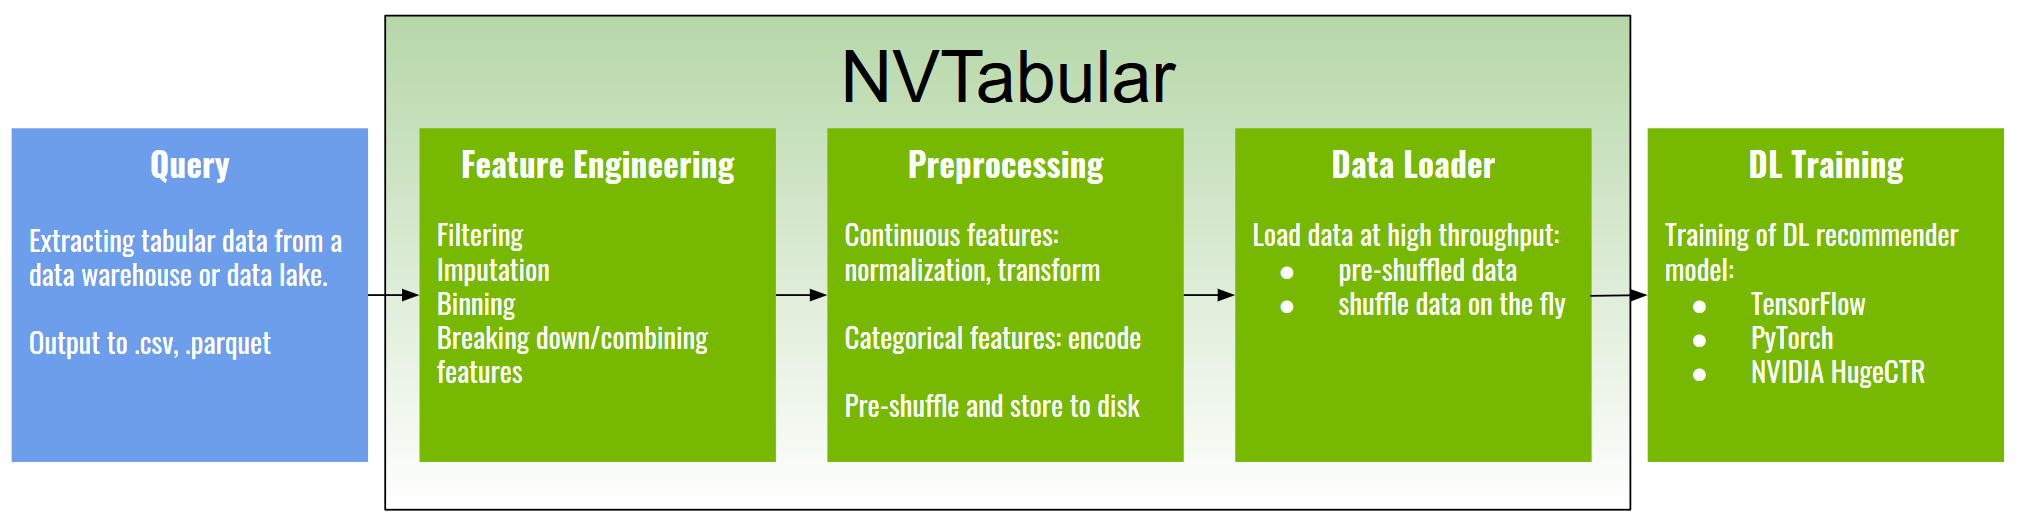

NVTabular has 4 main components:

1. Dataset: A dataset contains a list of files and iterates over the files. If necessary, it will read a file in chunks.
2. Op: An Op defines the calculation, which should be exectued. For example, an op could be to collect the mean/std for a column, fill in missing values or combine two categories.
3. Workflow: A workflow orchastrates the pipeline
  - It defines the contex, which columns are categorical, numerical or the label
  - It registers the operations (calculation) for the different column types
  - It optimizes the tasks by reordering the operations
  - It collects the required statistics for operations (e.g. the mean/std for normalization)
  - It applies the final operations to the dataset
4. Dataloader: NVTabular provides optimized dataloader for tabular data in PyTorch and Tensorflow

In [10]:
!pip install nvtabular

     |████████████████████████████████| 191 kB 7.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for nvtabular: filename=nvtabular-0.5.3-py3-none-any.whl size=231724 sha256=787778b5f104a27a6a51a7573ef7c03c40b7127b7a93df87eebe59495d2283c9
  Stored in directory: /root/.cache/pip/wheels/d0/d5/d3/177c1a93a7f274135cf9b1bce626c7a73b7c6f131d5bd9dbe3
Successfully built nvtabular


In [15]:
import glob

import nvtabular as nvt
from nvtabular import ops

### Load data

In [ ]:
!cp /content/drive/MyDrive/Recommendation/data_silver_l3.zip /content
!unzip /content/data_silver_l3.zip

In [16]:
train_paths = glob.glob('/content/train.parquet')
valid_paths = glob.glob('/content/valid.parquet')

train_dataset = nvt.Dataset(train_paths, engine='parquet', part_mem_fraction=0.15)
valid_dataset = nvt.Dataset(valid_paths, engine='parquet', part_mem_fraction=0.15)

In [17]:
train_dataset.head()

,event_time,event_type,product_id,brand,price,user_id,user_session,target,timestamp,ts_hour,ts_minute,ts_weekday,ts_day,ts_month,ts_year,cat_0,cat_1,cat_2,cat_3
0,2020-01-23 10:22:27 UTC,cart,1005101,xiaomi,419.31,602604607,ec725848-03db-4a0d-94b2-d0121f79dbb5,0,2020-01-23 10:22:27,10,22,3,23,1,2020,construction,tools,light,NA
1,2020-01-23 10:22:27 UTC,cart,17300751,versace,81.57,543745697,860e30ab-c461-40ef-aa17-1f74acc94f21,0,2020-01-23 10:22:27,10,22,3,23,1,2020,apparel,shoes,sandals,NA
2,2020-01-23 10:22:37 UTC,cart,4802273,samsung,6.67,512756088,0b8d5157-50ee-46ae-9772-e599004d1cbc,0,2020-01-23 10:22:37,10,22,3,23,1,2020,sport,bicycle,NA,NA
3,2020-01-23 10:22:38 UTC,cart,2900561,midea,48.86,571387327,2366dffb-a199-4aa1-b6a3-12fe807ea80d,0,2020-01-23 10:22:38,10,22,3,23,1,2020,furniture,bedroom,blanket,NA
4,2020-01-23 10:22:40 UTC,cart,17501003,enough,6.69,590902280,38efa242-cba4-45ac-8d28-a96d964d0e57,0,2020-01-23 10:22:40,10,22,3,23,1,2020,apparel,costume,NA,NA


### Define the data schema

In [ ]:
nvt.Workflow()

In [19]:
proc = nvt.Workflow(
    cat_features=['product_id', 'brand', 'user_id',
       'user_session', 'cat_0', 'cat_1', 'cat_2', 'cat_3',
       'ts_hour', 'ts_minute', 'ts_weekday', 'ts_day', 'ts_month', 'ts_year'],
    cont_features=['price', 'timestamp'],
    label_name=['target']
)

TypeError: ignored

In [ ]:
proc.add_feature([
    ops.LambdaOp(
        op_name = 'user_id',
        f = lambda col, gdf: col.astype(str) + '_' + gdf['user_id'].astype(str),
        columns = ['product_id', 'brand', 'ts_hour', 'ts_minute'],
        replace=False
    ),
    ops.LambdaOp(
        op_name = 'user_id_brand',
        f = lambda col, gdf: col.astype(str) + '_' + gdf['user_id'].astype(str) + '_' + gdf['brand'].astype(str),
        columns = ['ts_hour', 'ts_weekday', 'cat_0', 'cat_1', 'cat_2'],
        replace=False
    ),
    ops.Categorify(
        freq_threshold=15,
        columns = [x + '_user_id' for x in ['product_id', 'brand', 'ts_hour', 'ts_minute']] + [x + '_user_id_brand' for x in ['ts_hour', 'ts_weekday', 'cat_0', 'cat_1', 'cat_2']] + ['product_id', 'brand', 'user_id', 'user_session', 'cat_0', 'cat_1', 'cat_2', 'cat_3', 'ts_hour', 'ts_minute', 'ts_weekday', 'ts_day', 'ts_month', 'ts_year']
    ),
    ops.LambdaOp(
        op_name = 'product_id',
        f = lambda col, gdf: col.astype(str) + '_' + gdf['product_id'].astype(str),
        columns = ['brand', 'user_id', 'cat_0'],
        replace=False
    ),
    ops.JoinGroupby(
        cont_names=[]
    ),
    ops.TargetEncoding(
        cat_groups = ['brand', 'user_id', 'product_id', 'cat_2', ['ts_weekday','ts_day']],
        cont_target= 'target',
        kfold=5,
        fold_seed=42,
        p_smooth=20,
    )
])